# Парсинг сайта Mangahub
Mangahub – сайт для чтения азиатских комиксов. На сайте есть общий каталог, в котором представлены все доступные на сайте комиксы. У каждого комикса есть собственная страница, на которой отображается подробная информация о произведении.

__Цель:__ спарсить названия комиксов, описания к ним, и их типы (манга, манхва, маньхуа и тп).

Ниже представлен скриншот каталога.

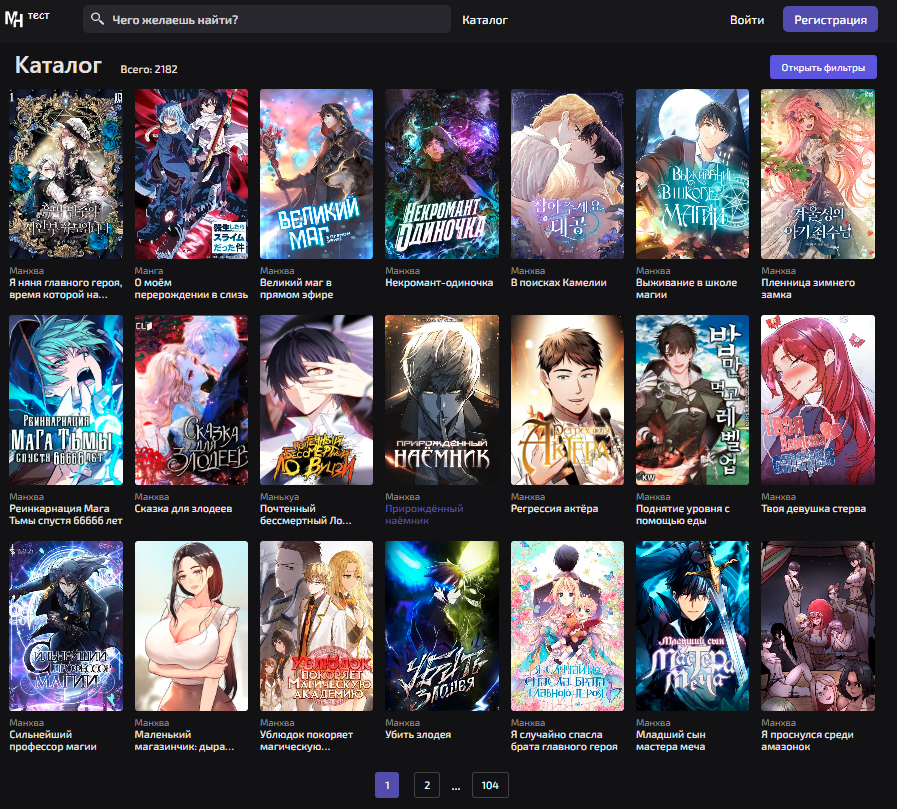

In [ ]:
#устанавливаю необходимые библиотеки
from bs4 import BeautifulSoup
import requests

url = 'https://mangahub.cc/manga'   #ссылка на каталог манги на сайте
catalog = requests.get(url)         #отправляю get запрос на сайт
print(catalog.status_code)          #проверяю доступ к сайту

200


In [ ]:
#получаю html код страницы
soup = BeautifulSoup(catalog.text, "html.parser")
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width" name="viewport"/>
<title>Каталог манги | Mangahub</title>
<link href="/static/imgs/base/favicon.png" rel="icon"/>
<link href="/static/imgs/base/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/static/imgs/base/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="/static/css/style14.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com" rel="preconnect"/>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://fonts.googleapis.com/css2?family=Expletus+Sans:wght@500;700&amp;family=Inter&amp;display=swap" rel="stylesheet"/>
<link href="https://fonts.googleapis.com" rel="preconnect"/>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://fonts.googleapis.com/css2?family=Exo+2:ital,wght@0,100..900;1,100..

In [5]:
#теперь начинаю делать ссылки для страниц каталога
link = 'https://mangahub.cc/manga?page='#беру кусочек ссылки до номера страницы
link_list = [link] * 104                #создаю лист из 104 таких же повторяющихся кусочков, потому что страниц в каталоге 104

#для листа с номера страниц определяю начальный и конечный элемент
r1 = 1
r2 = 105
pages_number_list = list(range(r1,r2))          #генерирую лист из чисел
str_pages = [str(i) for i in pages_number_list] #преобразую элементы листа в строки

#смотрю, что из этого получилось
print(link_list)
print(str_pages)

['https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.cc/manga?page=', 'https://mangahub.c

In [7]:
#теперь объединяю два листа, чтобы номера страниц присоединились к начальному кусочку ссылки
pages_links = [a + b for a, b in zip(link_list, str_pages)]

#смотрю, как выглядят ссылки страниц в окончательном виде
print(pages_links)

['https://mangahub.cc/manga?page=1', 'https://mangahub.cc/manga?page=2', 'https://mangahub.cc/manga?page=3', 'https://mangahub.cc/manga?page=4', 'https://mangahub.cc/manga?page=5', 'https://mangahub.cc/manga?page=6', 'https://mangahub.cc/manga?page=7', 'https://mangahub.cc/manga?page=8', 'https://mangahub.cc/manga?page=9', 'https://mangahub.cc/manga?page=10', 'https://mangahub.cc/manga?page=11', 'https://mangahub.cc/manga?page=12', 'https://mangahub.cc/manga?page=13', 'https://mangahub.cc/manga?page=14', 'https://mangahub.cc/manga?page=15', 'https://mangahub.cc/manga?page=16', 'https://mangahub.cc/manga?page=17', 'https://mangahub.cc/manga?page=18', 'https://mangahub.cc/manga?page=19', 'https://mangahub.cc/manga?page=20', 'https://mangahub.cc/manga?page=21', 'https://mangahub.cc/manga?page=22', 'https://mangahub.cc/manga?page=23', 'https://mangahub.cc/manga?page=24', 'https://mangahub.cc/manga?page=25', 'https://mangahub.cc/manga?page=26', 'https://mangahub.cc/manga?page=27', 'https://

In [9]:
#теперь создаю два пустых листа для названий комиксов
titles = []
all_titles = []

i = 0 #создаю счетчик для цикла

while i <= len(pages_links): #определяю до каких пор будет идти счетчик
    url = pages_links[i]     #создаю переменную для i-го элемента в листе ссылок страниц
    page = requests.get(url) #перехожу по i-й ссылке
    soup = BeautifulSoup(page.text, "html.parser") #вытаскиваю html код i-й страницы каталога
    all_titles = soup.find_all('div', class_='title_name') #нахожу все названия по тегу и классу
    for data in all_titles:
        if data.find_all('div', class_='title_name') is not None:
            titles.append(data.text) #вытаскиваю сами названия комиксов
    i += 1

IndexError: list index out of range

In [10]:
#смотрю, что в итоге получилось
print(titles)

['Я няня главного героя, время которой на исходе.', 'О моём перерождении в слизь', 'Великий маг в прямом эфире', 'Некромант-одиночка', 'В поисках Камелии', 'Выживание в школе магии', 'Пленница зимнего замка', 'Реинкарнация Мага Тьмы спустя 66666 лет', 'Сказка для злодеев', 'Почтенный бессмертный Ло Вуцзи', 'Прирождённый наёмник', 'Регрессия актёра', 'Поднятие уровня с помощью еды', 'Твоя девушка стерва', 'Сильнейший профессор магии', 'Маленький магазинчик: дыра снова открыта!', 'Ублюдок покоряет магическую академию!', 'Убить злодея', 'Я случайно спасла брата главного героя', 'Младший сын мастера меча', 'Я проснулся среди амазонок', 'Сильнейший некромант с эволюционными характеристиками', 'Башня - Мое наследство.', 'Я стал графским ублюдком', 'Бездарный человек', 'Мой герцог не умрёт!', 'Это не твой ребенок', 'Целитель с системой хирурга', 'Непобедимый бог академии охотников', 'Ещё раз в свет', 'От нерадивого аристократа до усердного гения', 'Как переманить мужа на свою сторону', 'Мои н

In [11]:
#проверяю действительно ли спарсились названия всех комиксов, должно быть 2182
len(titles)

2182

In [12]:
#по той же схеме достаю типы комиксов
types = []
all_types = []

i = 0

while i <= len(pages_links):
    url = pages_links[i]
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")
    all_types = soup.find_all('div', class_='title_type')
    for data in all_types:
        if data.find_all('div', class_='title_type') is not None:
            types.append(data.text)
    i += 1

IndexError: list index out of range

In [14]:
#смотрю, что получилось
print(types)
len(types)

['Манхва', 'Манга', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Маньхуа', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Западный комикс', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Маньхуа', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Маньхуа', 'Манхва', 'Манхва', 'Манхва', 'Манга', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Маньхуа', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Маньхуа', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Манхва', 'Маньхуа', 'Манхв

2182

In [15]:
#теперь надо спарсить ссылки на страницы каждого из комиксов
#иду по той же схеме
title_links = []
all_title_links = []

i = 0

while i <= len(pages_links):
    url = pages_links[i]
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")
    all_title_links = soup.find_all('a', class_='title_poster_link')
    for data in all_title_links:
        title_links.append(data.get('href'))
    i += 1

IndexError: list index out of range

In [17]:
#смотрю, что получилось спарсить
print(title_links)
len(title_links)

['/manga/I-am-the-terminally-ill-nanny-of-the-dark-skinned-male-protagonist', '/manga/Regarding-Reincarnated-to-Slime', '/manga/BJ-Grade-Mage', '/manga/Necromancer-alone', '/manga/Finding-Camellia', '/manga/How-to-live-as-a-wizard-at-the-a-Magic-School', '/manga/The-Winter-Baby-Prisoner', '/manga/Reincarnation-of-the-Mage-of-Darkness-after-66666-years', '/manga/A-Fairy-Tales-for-the-Villains--webtoon', '/manga/Xian-Zun-Luo-Wuji', '/manga/Born-mercenary', '/manga/I-will-live-as-an-actor', '/manga/Raising-the-level-with-food', '/manga/Your-girl-is-hot', '/manga/I-got-a-fake-job-at-the-academy', '/manga/A-small-shop--we-opened-a-hole', '/manga/The-bastard-conquers-the-magic-academy', '/manga/Villain-to-Kill', '/manga/I-accidentally-saved-the-younger-brother-of-the-male-lead', '/manga/Swordmaster-s-Youngest-Son', '/manga/Yas-revival-period', '/manga/Strongest-Necromancer-With-Evolutionary-Characteristics', '/manga/The-Tower-is-my-Inheritance', '/manga/Trash-of-the-Count-s-Family', '/manga/

2182

In [46]:
#ссылки не полные, не хватает начальной части https://mangahub.cc
#поэтому делаю лист из 2182 таких кусочков
start_link = 'https://mangahub.cc'
start_link_list = [start_link] * 2182

#и теперь соединяю с другим листом, где неполные кусочки ссылок
full_title_links = [a + b for a, b in zip(start_link_list, title_links)]
#смотрю, что из этого получилось
print(full_title_links)

['https://mangahub.cc/manga/I-am-the-terminally-ill-nanny-of-the-dark-skinned-male-protagonist', 'https://mangahub.cc/manga/Regarding-Reincarnated-to-Slime', 'https://mangahub.cc/manga/BJ-Grade-Mage', 'https://mangahub.cc/manga/Necromancer-alone', 'https://mangahub.cc/manga/Finding-Camellia', 'https://mangahub.cc/manga/How-to-live-as-a-wizard-at-the-a-Magic-School', 'https://mangahub.cc/manga/The-Winter-Baby-Prisoner', 'https://mangahub.cc/manga/Reincarnation-of-the-Mage-of-Darkness-after-66666-years', 'https://mangahub.cc/manga/A-Fairy-Tales-for-the-Villains--webtoon', 'https://mangahub.cc/manga/Xian-Zun-Luo-Wuji', 'https://mangahub.cc/manga/Born-mercenary', 'https://mangahub.cc/manga/I-will-live-as-an-actor', 'https://mangahub.cc/manga/Raising-the-level-with-food', 'https://mangahub.cc/manga/Your-girl-is-hot', 'https://mangahub.cc/manga/I-got-a-fake-job-at-the-academy', 'https://mangahub.cc/manga/A-small-shop--we-opened-a-hole', 'https://mangahub.cc/manga/The-bastard-conquers-the-mag

In [54]:
#ссылки на страницы комиксов теперь есть, перехожу к парсингу описаний комиксов
descriptions = []
all_descriptions = []

i = 0

while i <= len(full_title_links):
    url = full_title_links[i]
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")
    all_descriptions = soup.find_all('p', class_='title_head_description')
    for data in all_descriptions:
        if data.find_all('p', class_='title_head_description') is not None:
            descriptions.append(data.text)
    i += 1

IndexError: list index out of range

In [58]:
#проверяю, что получилось
print(descriptions)
len(descriptions)

['Написанный мною роман загубил жизни множества людей и, если я ничего не изменю, Клод вырастет жестоким человеком, который разрушит империю Кромвель.\r\n\r\n«Я всегда буду рядом с Клодом». Такую клятву я дала своей единственной подруге Диллен, которую в романе постигнет трагичная судьба.\r\n\r\nЯ положу все силы на то, чтобы сделать Эдана хорошим отцом, который всегда будет дарить Клоду тёплую, как солнечные лучи, любовь, чтобы мальчик смог вырасти хорошим человеком. Но не слишком ли я перестаралась?\r\n\r\n«Каждый раз одно и то же, у тебя всегда есть сотни причин бросить меня, а у меня ни одной».\r\n\r\n«Няня, ты ведь всегда будешь рядом со мной, да?»\r\n\r\nКажется, оба господина герцогства Амброзия привязались ко мне!..', '37-летний японец-холостяк был зарезан на улице каким-то мерзавцем-грабителем. Тут бы и истории конец, да всё обернулось иначе, неожиданно он переродился слизью в фэнтезийном мире. Но что может сделать, пускай и разумная, но слизь?', 'От автора манхвы “Убить героя

2182

In [95]:
#делаю датафрейм с помощью библиотеки pandas
import pandas as pd
df = pd.DataFrame({'Title': titles, 'Description': descriptions, 'Type': types})
print(df)

                                                Title  \
0     Я няня главного героя, время которой на исходе.   
1                         О моём перерождении в слизь   
2                          Великий маг в прямом эфире   
3                                  Некромант-одиночка   
4                                   В поисках Камелии   
...                                               ...   
2177                                      Жнец смерти   
2178                            Завтрашняя катастрофа   
2179                               Мемуары Бога Войны   
2180                              Повелитель монстров   
2181        Госслужащий, переродившийся в другом мире   

                                            Description     Type  
0     Написанный мною роман загубил жизни множества ...   Манхва  
1     37-летний японец-холостяк был зарезан на улице...    Манга  
2     От автора манхвы “Убить героя”: Джун Хён У не ...   Манхва  
3     Мир на грани разрушения. Существа, упомин

In [94]:
df.to_csv(r'/content/manga00.csv', index=False, sep=";")